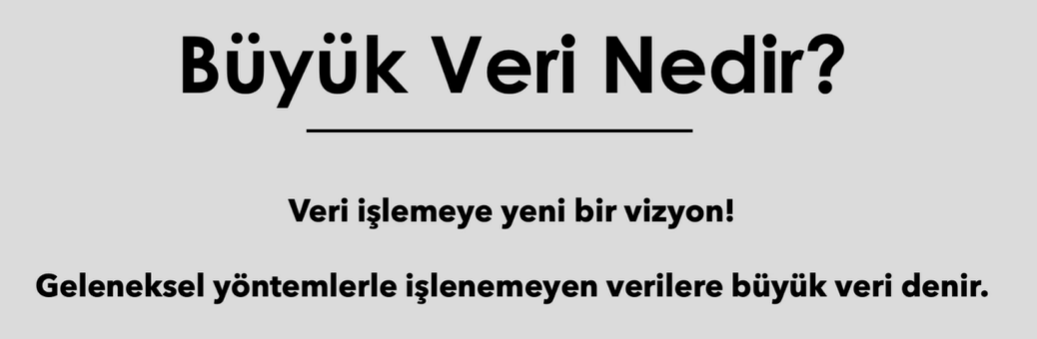

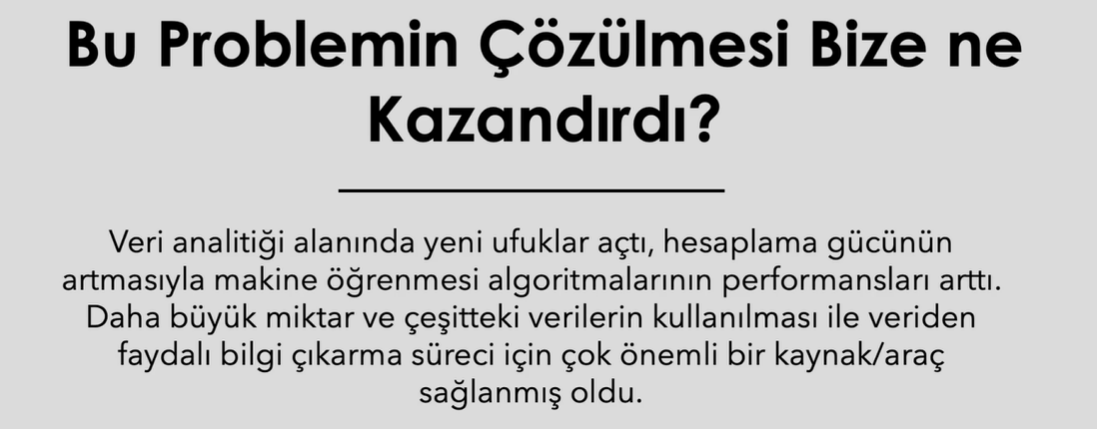

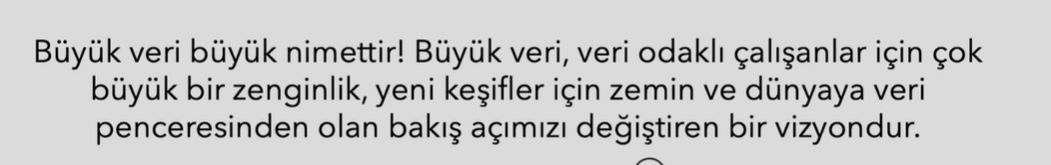

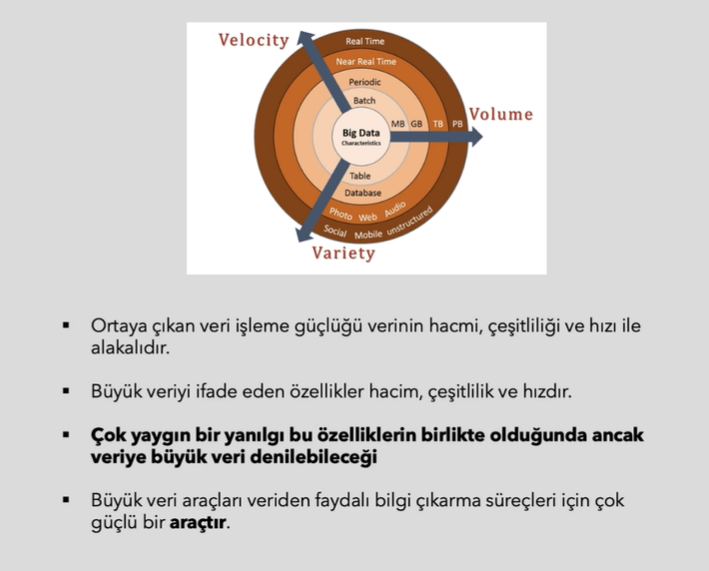

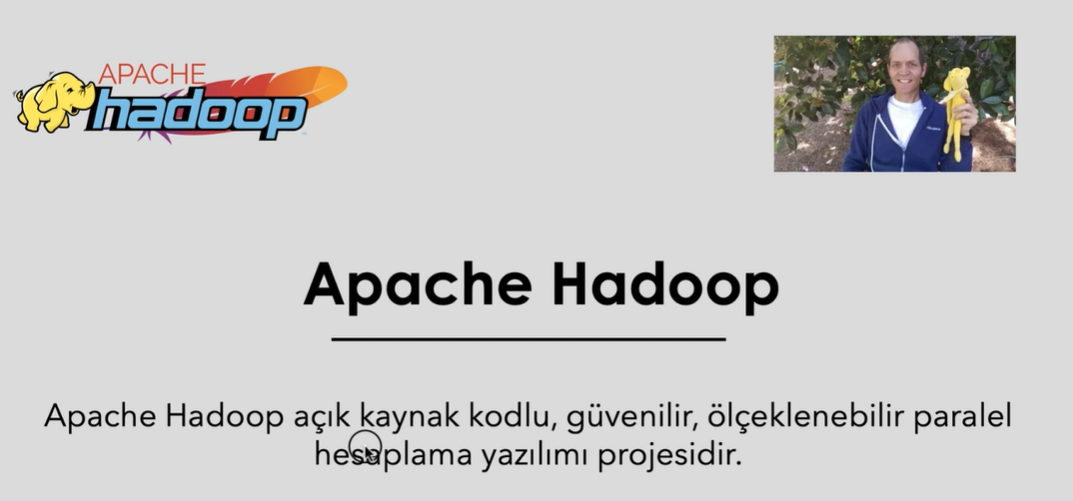

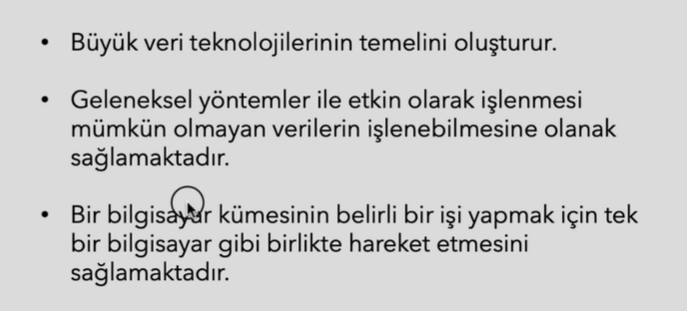

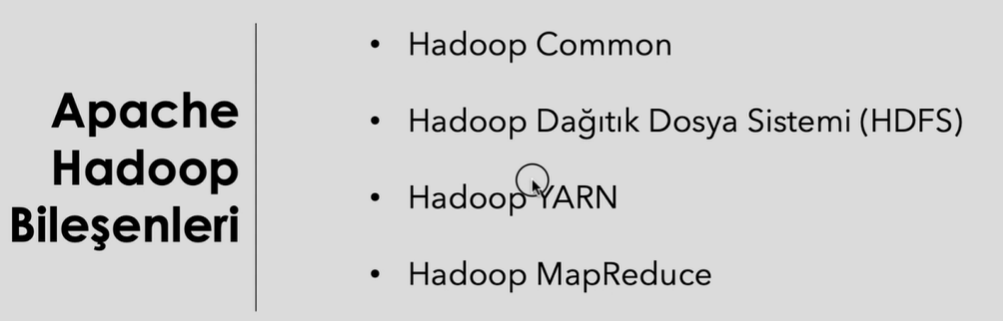

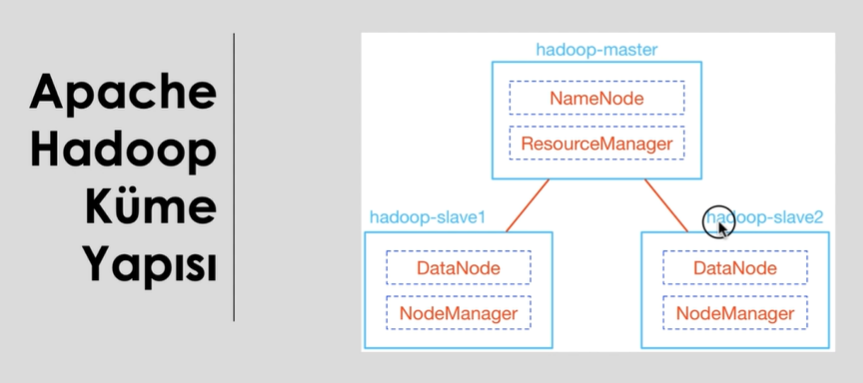

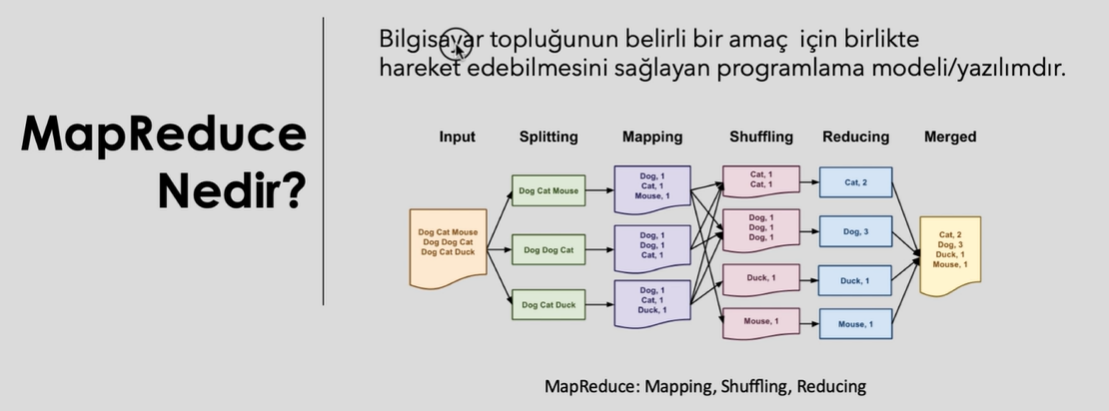

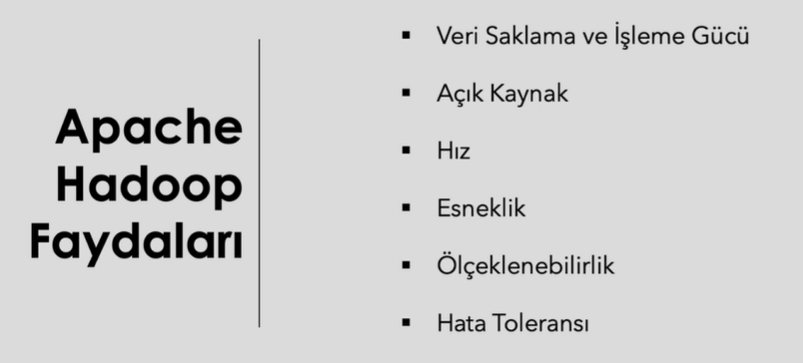

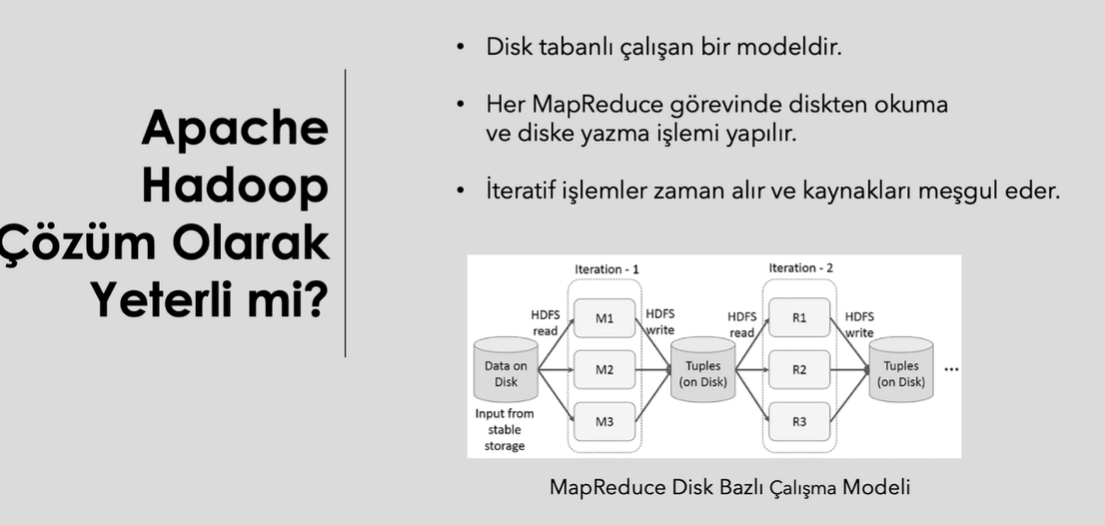

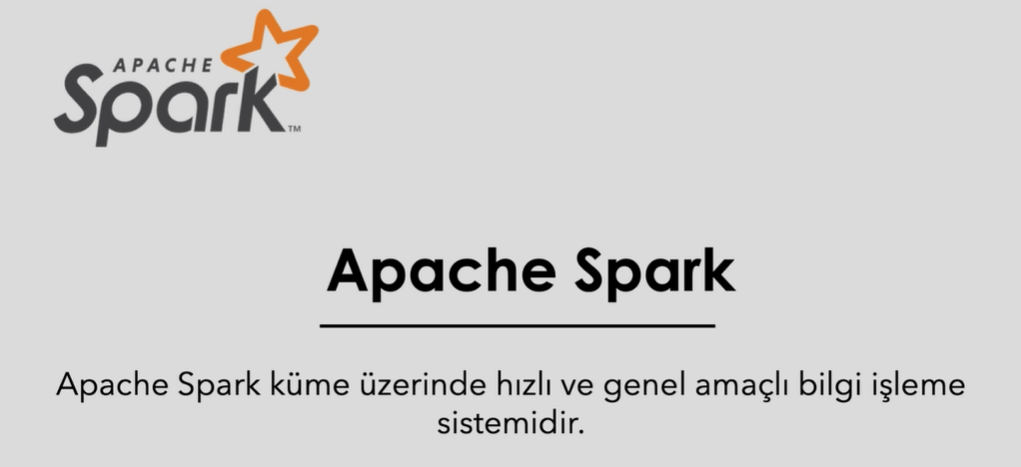

In [ ]:
Apache Hadoop mapreduce parametresi üzerine kurulan bir uygulamadır.

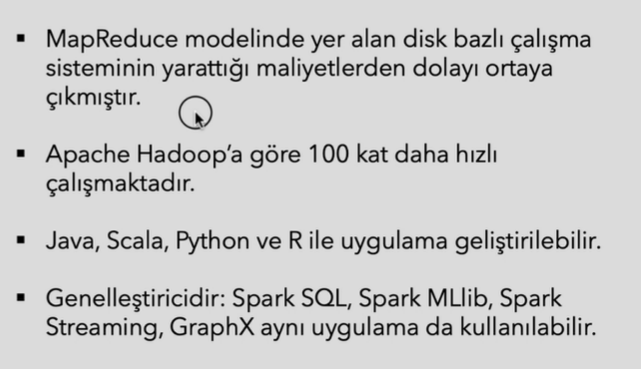

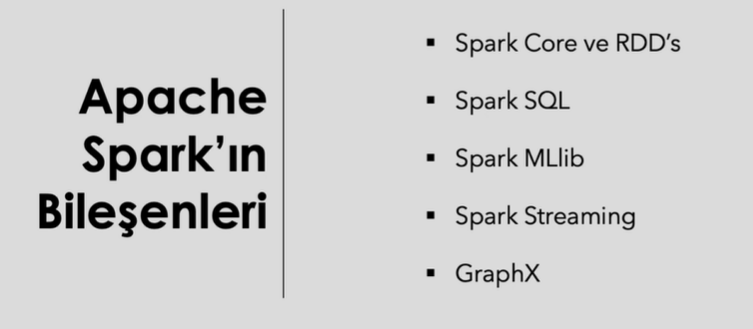

In [ ]:
Spark Streaming, Spark API uzantısıdır.

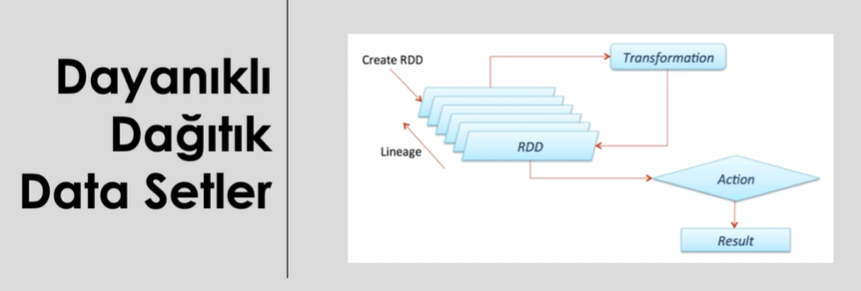

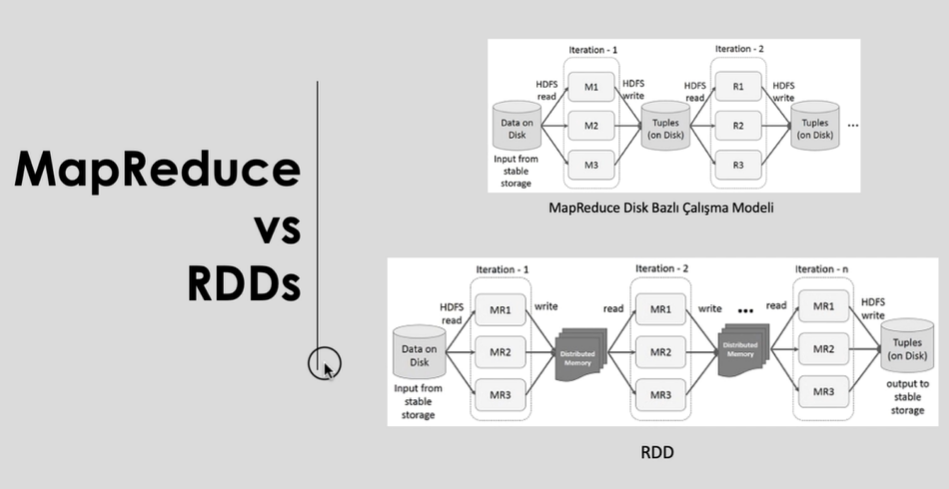

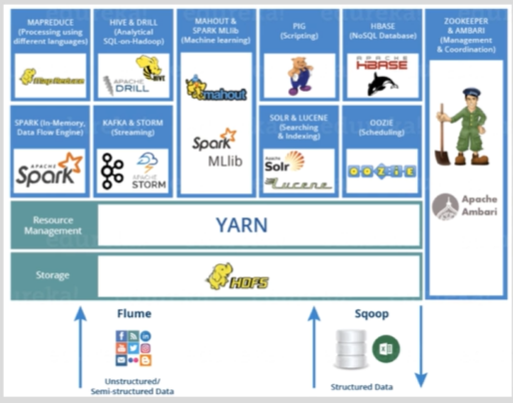

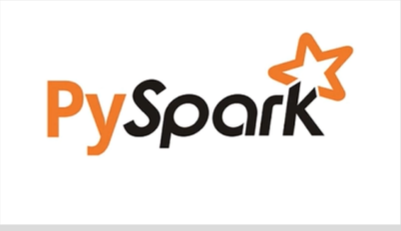

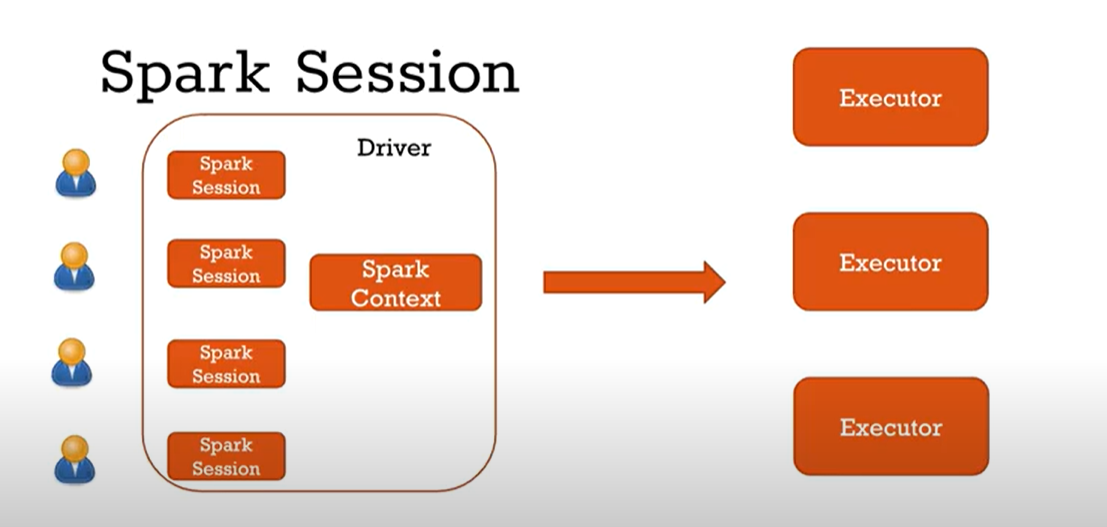

In [1]:
!pip install findspark

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import findspark
findspark.init("C:\BigDataSource\Spark")

In [3]:
import pyspark
from pyspark import SparkContext

# Configurasyon ve Spark Bağlantısı 

In [4]:
from pyspark import SparkContext
sc = SparkContext(master = "local")
sc

# aşağıdaki Spark UI tıkladığımızda yaptığımız uygulamayı takip edebileceğimiz arayüze geçebiliriz.

<SparkContext master=local appName=pyspark-shell>

In [5]:
sc.version

'3.1.2'

In [6]:
sc.sparkUser()

'HP'

In [7]:
sc.appName

'pyspark-shell'

In [8]:
dir(sc)

['PACKAGE_EXTENSIONS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_assert_on_driver',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addFile',
 'addPyFile',
 'appName',
 'applicationId',
 'binaryFiles',
 'bina

In [8]:
sc.stop()  # açılan bir session veya açılan arayüzü kapatmak için kullanılır. Kapatılması tavsiye edilir.

In [ ]:
# Buranın boş bırakılması tercih edilir. Sisteme uygun bir şekilde ön tanımlı değerleri ile bir işlem gerçekleşir. # spark.execu

In [9]:
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
SparkConf().getAll()

[('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.name', 'pyspark-shell')]

In [10]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate();
sc

<SparkContext master=local[*] appName=pyspark-shell>

# Temel DataFrame İşlemleri

In [63]:
spark_df = spark.read.csv("diabetes.csv", header = True, inferSchema = True)

In [12]:
spark_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [13]:
type(spark_df)  # görüldüğü gibi sonuç bir spark df dir.

pyspark.sql.dataframe.DataFrame

In [14]:
spark_df.cache()  # veriyi RAM taşımak gibi düşünebiliriz.

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [15]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [16]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])

In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
df.head()

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

In [19]:
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [20]:
df.dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [21]:
spark_df.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [22]:
df.ndim

2

In [23]:
spark_df.size

AttributeError: 'DataFrame' object has no attribute 'size'

In [24]:
spark_df.show(2)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 2 rows



In [25]:
spark_df.count()

768

In [26]:
len(spark_df.columns)

9

In [27]:
spark_df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [ ]:
# degisken secme

In [28]:
spark_df.describe("Glucose").show()

+-------+-----------------+
|summary|          Glucose|
+-------+-----------------+
|  count|              768|
|   mean|     120.89453125|
| stddev|31.97261819513622|
|    min|                0|
|    max|              199|
+-------+-----------------+



In [29]:
spark_df.select("Glucose","Pregnancies").show(5)  # değişkenlerin ilk 5 değerini aldık.

+-------+-----------+
|Glucose|Pregnancies|
+-------+-----------+
|    148|          6|
|     85|          1|
|    183|          8|
|     89|          1|
|    137|          0|
+-------+-----------+
only showing top 5 rows



In [30]:
spark_df.select("Glucose").distinct().count()

136

In [31]:
spark_df.select("Glucose").dropDuplicates().count() # yukarıdaki işlemi bunun ile doğruladık.

136

In [32]:
spark_df.crosstab("Outcome","Pregnancies").show() # iki değişkeni çaprazladık.

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [34]:
spark_df.dropna().count()  # eksik gözlem sayısını verir.

768

In [33]:
spark_df.dropna().show(3)  # eksik gözlemlerden kurtulmak için.

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



In [ ]:
# gozlem secme

In [35]:
spark_df.filter(spark_df.Age >40).count()

194

In [36]:
spark_df.groupby("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [37]:
spark_df.groupby("Outcome").agg({"BMI": "mean"}).show()

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



In [38]:
# yeni bir değişken tanımladık yani ekledik.

spark_df.withColumn("yeni_degisken", spark_df.BMI / 2).select("BMI","yeni_degisken").show(5)

+----+-------------+
| BMI|yeni_degisken|
+----+-------------+
|33.6|         16.8|
|26.6|         13.3|
|23.3|        11.65|
|28.1|        14.05|
|43.1|        21.55|
+----+-------------+
only showing top 5 rows



In [39]:
spark_df.withColumnRenamed("Outcome","bagimli_degisken").columns  # değişken ismini değiştirdik.

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'bagimli_degisken']

In [40]:
spark_df.show(3)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



In [41]:
spark_df.drop("Insulin").columns  # değişken sildik.

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [46]:
spark_df.groupby("Outcome").count().show() # burada 500 ulaşmak istiyorum.

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [42]:
a = spark_df.groupby("Outcome").count().toPandas()

# groupby outcome işlemi sonucu istediğim elemana ulaşmak için önce pandas çeviriyorum.

In [43]:
a

Outcome  count
0        1    268
1        0    500

In [44]:
a.iloc[1,1]

500

# SQL İşlemleri

In [47]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [48]:
spark_df.registerTempTable("table_df")

In [49]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [50]:
spark.sql("show tables").show()  # tabloları görmek için.

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        | table_df|       true|
+--------+---------+-----------+



In [51]:
spark.sql("select Glucose from table_df").show(5)

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
+-------+
only showing top 5 rows



In [52]:
spark.sql("select Outcome, mean(Glucose) from table_df group by Outcome").show(5)

+-------+------------------+
|Outcome|     mean(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



# Büyük Veri Görselleştirme

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [60]:
sns.barplot(x = "Outcome", y = spark_df.Outcome.index, data = spark_df)

AttributeError: 'DataFrame' object has no attribute 'Outcome'

In [64]:
sdf = spark_df.toPandas()
sdf.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<AxesSubplot:xlabel='Outcome'>

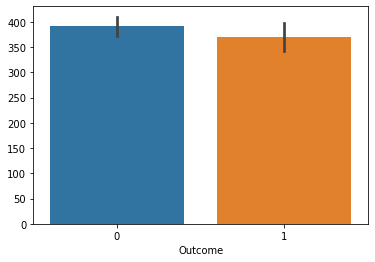

In [65]:
sns.barplot(x = "Outcome", y = sdf.Outcome.index, data = sdf)

# Uçtan Büyük Veride Makine Öğrenmesi

## Spark Session ve Veri Seti

In [66]:
sc.stop()  # her çalışma sonunda bu işlemi yapmakta fayda var. Önceki session ları kapatmış oluyoruz.

In [67]:
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark import SparkContext 

spark = SparkSession.builder.getOrCreate()
SparkConf().getAll()

sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [68]:
spark_df = spark.read.csv("churn.csv", 
                          header = True, 
                          inferSchema = True,
                          sep = ",")
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [69]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [70]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [71]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])  

# tüm değişken isimlerini küçük harfe çevirdik.

In [72]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [ ]:
# df.columns = map(str.lower, df.columns) # yukarıdaki işlemi bunun ile de yapabilirdik.

In [73]:
spark_df = spark_df.withColumnRenamed("_c0", "index")  # değişken ismini değiştirdik.

In [74]:
spark_df.show(2)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 2 rows



In [75]:
spark_df.count()

900

In [76]:
len(spark_df.columns)

8

In [77]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [78]:
spark_df.distinct().count()

900

In [79]:
spark_df.select("names").distinct().count()  

# 900 adet gözlem var ancak names 899 çıktı. Acaba bu isim çoklama mı yoksa aynı isimde 2 kişi mi var?

899

In [80]:
spark_df.groupby("names").count().sort("count", ascending = False).show(3)

+--------------+-----+
|         names|count|
+--------------+-----+
| Jennifer Wood|    2|
|Jesse Mitchell|    1|
|Richard Farmer|    1|
+--------------+-----+
only showing top 3 rows



In [81]:
spark_df.filter(spark_df.names == "Jennifer Wood").show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [82]:
# incelediğimizde aynı ismi taşıyan farklı bilgi taşıyan gözlem olduğunu gördük.

# Tekrar eden bu ismi sildik. Ancak bunu kaydetmedik.

spark_df.select("names").dropDuplicates().groupBy("names").count().sort("count",ascending = False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



In [84]:
spark_df.where(spark_df.index == 439).show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [83]:
spark_df.where(spark_df.index == 439).select("names").show()

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [85]:
spark_df.where(spark_df.index == 439).collect()

[Row(index=439, names='Jennifer Wood', age=48.0, total_purchase=11585.16, account_manager=0, years=4.61, num_sites=9.0, churn=0)]

In [86]:
spark_df.where(spark_df.index == 439).collect()[0]

Row(index=439, names='Jennifer Wood', age=48.0, total_purchase=11585.16, account_manager=0, years=4.61, num_sites=9.0, churn=0)

In [87]:
spark_df.where(spark_df.index == 439).collect()[0]["names"]

'Jennifer Wood'

In [88]:
jen = spark_df.where(spark_df.index == 439).collect()[0]["names"]

In [89]:
type(jen)

str

In [ ]:
dir(jen)

In [90]:
jen.upper()

'JENNIFER WOOD'

## Keşifçi Veri Analizi

In [91]:
print(spark_df.describe().show())  

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [92]:
spark_df.select("age","total_purchase", "account_manager", "years","num_sites","churn").describe().toPandas().transpose()

# seçtiğimiz değişkenleri çektik, ve bunların pandas çevirip sonra transpose baktık. Ancak kaydetmedik.

0                    1                   2      3  \
summary          count                 mean              stddev    min   
age                900    41.81666666666667   6.127560416916251   22.0   
total_purchase     900    10062.82403333334   2408.644531858096  100.0   
account_manager    900   0.4811111111111111  0.4999208935073339      0   
years              900     5.27315555555555   1.274449013194616    1.0   
num_sites          900    8.587777777777777  1.7648355920350969    3.0   
churn              900  0.16666666666666666  0.3728852122772358      0   

                        4  
summary               max  
age                  65.0  
total_purchase   18026.01  
account_manager         1  
years                9.15  
num_sites            14.0  
churn                   1

In [93]:
spark_df.filter(spark_df.age > 47).count() # Age mean + std sonucunda 47 üzeri olanlara bakmak istedim.

161

In [94]:
spark_df.groupby("churn").count().show()  

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [95]:
spark_df.groupby("churn").agg({"total_purchase": "mean"}).show() 

# churn göre ortalama total_purchase değerlerine baktık. iki sınıftaki değerlerin birbirine çok yakın olduğunu gördük.

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [96]:
spark_df.groupby("churn").agg({"years": "mean"}).show()

# churn göre ortalama year değerlerine baktık. burada ise churn olanları içerisinde daha uzun zamandır müşteri olanlar gözlemlenmiştir.

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [100]:
kor_data = spark_df.drop("index","names","churn").toPandas()  # corr matriksi oluşturduk.

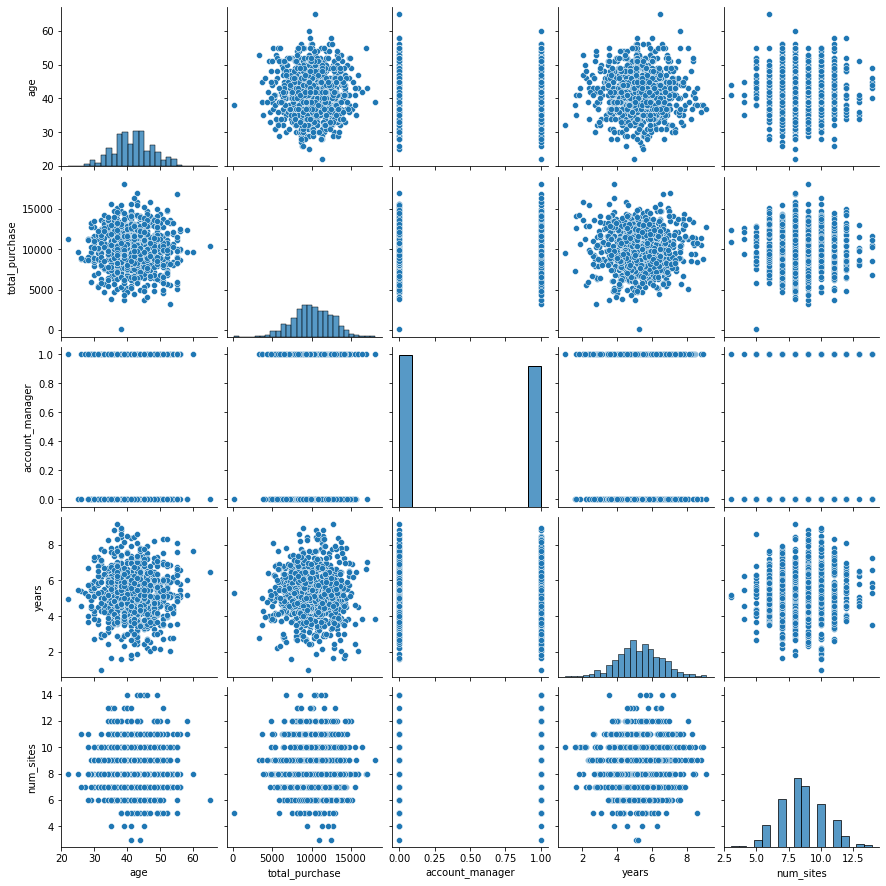

In [101]:
import seaborn as sns
sns.pairplot(kor_data);  

# bağımsız değişkenlerin birbiri ile ilişkisine baktık. account_manager kategorik olduğundan düzgün bir sonuç çıkmayacak.

In [106]:
kor_data = spark_df.drop("index","names").toPandas()

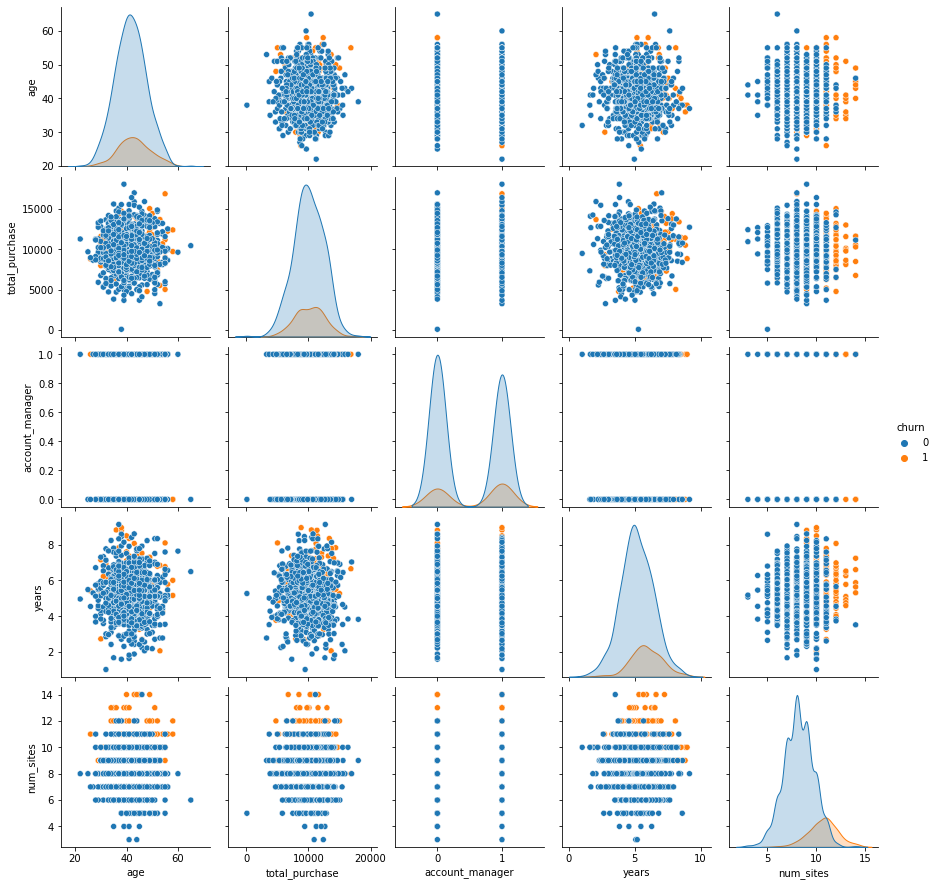

In [107]:
sns.pairplot(kor_data, hue = "churn"); 

# churn düşmeden bunun ile yeni bir boyut katarak bir yorumlama yapmak istedik. ufak tefek ayırtedici hususlar ortaya çıktı böylece.

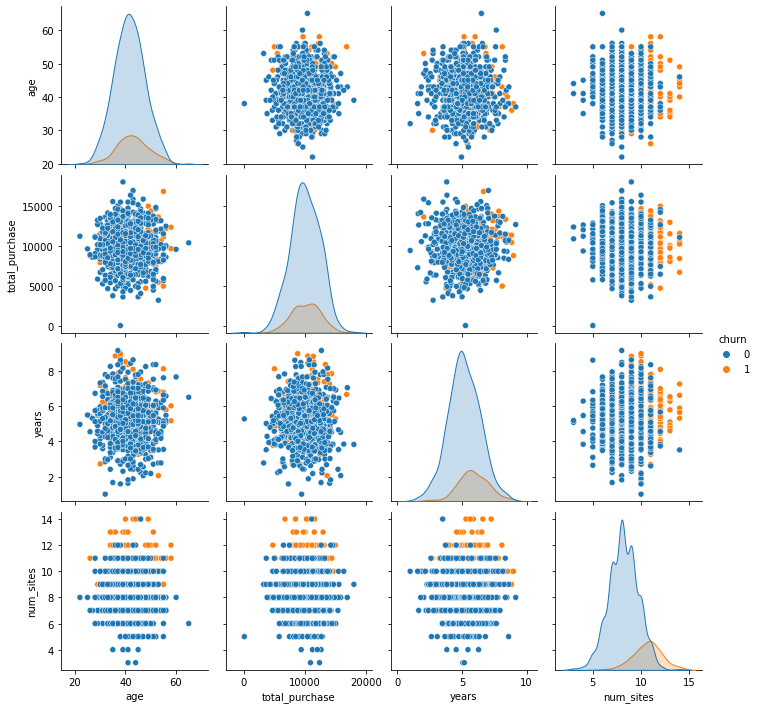

In [108]:
sns.pairplot(kor_data, vars = ["age", "total_purchase","years","num_sites"],  # burada ise bağımlı değişkeni grafiğe koymadan bir boyut olarak bir işlem yapmak istersek.
             hue = "churn");

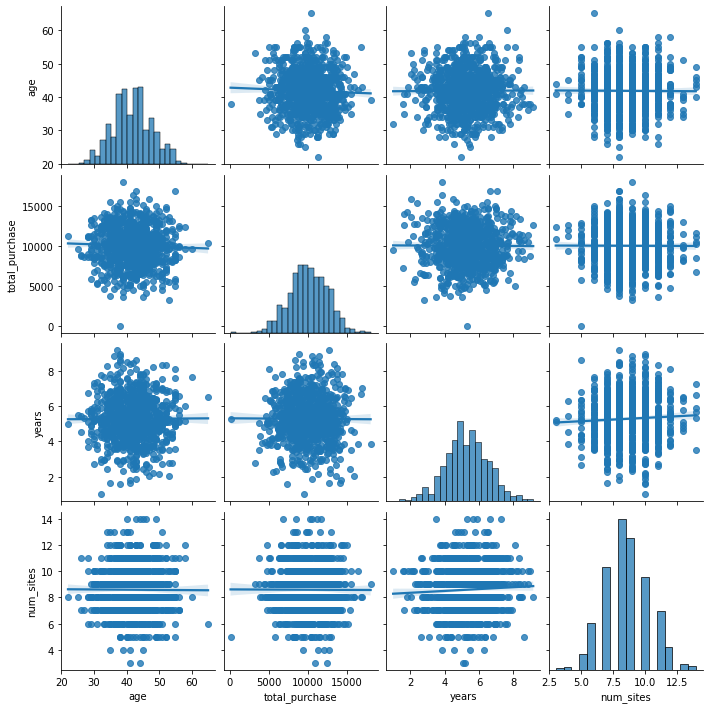

In [110]:
sns.pairplot(kor_data, vars = ["age", "total_purchase","years","num_sites"],  
             kind = "reg");

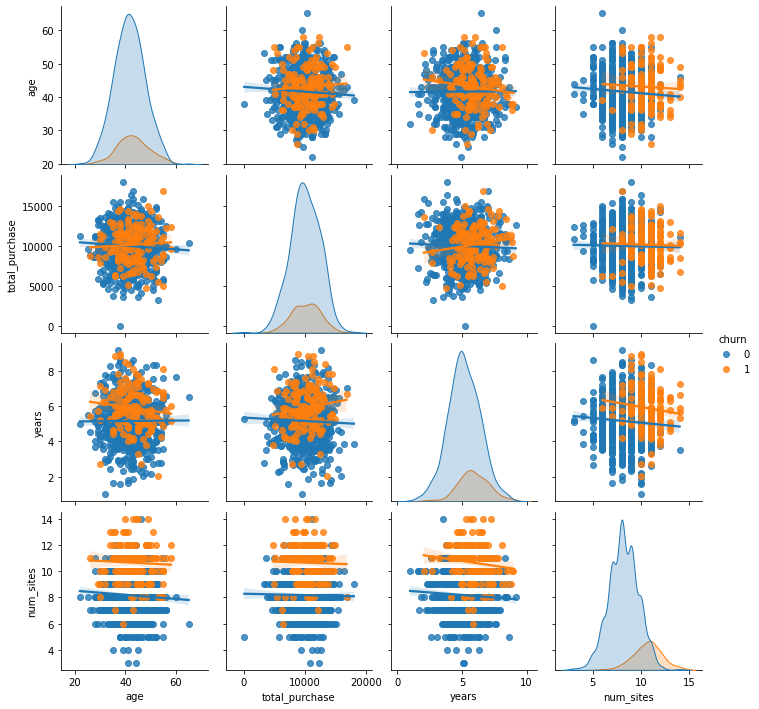

In [109]:
sns.pairplot(kor_data, vars = ["age", "total_purchase","years","num_sites"],  
             hue = "churn",
             kind = "reg");

## Veri Ön İşleme

In [111]:
spark_df = spark_df.dropna()

In [112]:
spark_df = spark_df.withColumn("age_kare", spark_df.age**2)

In [113]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 3 rows



In [114]:
from pyspark.ml.feature import StringIndexer  # string dönüştürücü çalıştırıyoruz.

stringIndexer = StringIndexer(inputCol = "churn", outputCol = "label") # bağımlı olanlara label, bağımsız olanlara ise feature diyoruz.

In [ ]:
?stringIndexer

In [115]:
indexed = stringIndexer.fit(spark_df).transform(spark_df) # önce fit ettik sonra dönüştürdük.

In [116]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'double')]

In [117]:
# yukarıdaki label double değilde integer olmasını istiyoruz.

spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

In [118]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'int')]

In [ ]:
# bagimsiz degiskenlerin ayarlanmasi

In [119]:
from pyspark.ml.feature import VectorAssembler

In [120]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [121]:
bag = ["age","total_purchase", "account_manager","years","num_sites"] # bağımsız değişkenleri yazdık.

In [122]:
vectorAssembler = VectorAssembler(inputCols = bag, outputCol = "features")

In [123]:
va_df = vectorAssembler.transform(spark_df)

In [124]:
final_df = va_df.select(["features","label"])

In [125]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



## Test-train

In [126]:
splits = final_df.randomSplit([0.7,0.3])
train_df = splits[0]
test_df = splits[1]

In [127]:
train_df

DataFrame[features: vector, label: int]

In [128]:
test_df

DataFrame[features: vector, label: int]

# GBM ile Müşteri Terk Modellemesi

In [129]:
from pyspark.ml.classification import GBTClassifier

In [130]:
gbm = GBTClassifier(maxIter = 10, featuresCol = "features", labelCol = "label") # model object oluşturduk.

In [131]:
gbm_model = gbm.fit(train_df) # modeli kurduk.

In [132]:
y_pred = gbm_model.transform(test_df)

In [133]:
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [134]:
ac = y_pred.select("label","prediction")

In [135]:
ac.filter(ac.label == ac.prediction).count() / ac.count()  

# accuracy score ulaştık. Bu cv yöntemi kullanılmamış yani native test error. Ancak buna güvenilmez. 

0.89272030651341

In [136]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator= gbm, estimatorParamMaps = paramGrid, evaluator=evaluator, numFolds= 5) # numFolds kaç katlı olacağını gösterir.

In [137]:
cv_model = cv.fit(train_df)

In [138]:
y_pred = cv_model.transform(test_df)
ac = y_pred.select("label","prediction")

In [139]:
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.9003831417624522

In [140]:
evaluator.evaluate(y_pred)

0.9098717112415742

## Bu müşteriler bizi terk eder mi?

In [141]:
import pandas as pd
names = pd.Series(["Ali Ahmetoğlu", "Berkcan Tanerbey", "Harika Gündüz","Polat Alemdar", "Ata Bakmayan Ali"])
age = pd.Series([38, 43, 34, 50, 40])
total_purchase = pd.Series([30000, 10000, 6000, 30000, 100000])
account_manager = pd.Series([1,0,0,1,1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30,8,8,6,50])


yeni_musteriler = pd.DataFrame({
    'names':names,
    'age': age,
    'total_purchase': total_purchase,
    'account_manager': account_manager ,
    'years': years,
    'num_sites': num_sites})

yeni_musteriler.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [142]:
yeni_musteriler

names  age  total_purchase  account_manager  years  num_sites
0     Ali Ahmetoğlu   38           30000                1     20         30
1  Berkcan Tanerbey   43           10000                0     10          8
2     Harika Gündüz   34            6000                0      3          8
3     Polat Alemdar   50           30000                1      8          6
4  Ata Bakmayan Ali   40          100000                1     30         50

In [143]:
yeni_sdf = spark.createDataFrame(yeni_musteriler)

In [144]:
type(yeni_sdf)

pyspark.sql.dataframe.DataFrame

In [145]:
yeni_sdf.show()

+----------------+---+--------------+---------------+-----+---------+
|           names|age|total_purchase|account_manager|years|num_sites|
+----------------+---+--------------+---------------+-----+---------+
|   Ali Ahmetoğlu| 38|         30000|              1|   20|       30|
|Berkcan Tanerbey| 43|         10000|              0|   10|        8|
|   Harika Gündüz| 34|          6000|              0|    3|        8|
|   Polat Alemdar| 50|         30000|              1|    8|        6|
|Ata Bakmayan Ali| 40|        100000|              1|   30|       50|
+----------------+---+--------------+---------------+-----+---------+



In [146]:
yeni_musteriler = vectorAssembler.transform(yeni_sdf)

In [147]:
sonuclar = cv_model.transform(yeni_musteriler)  # bunu modelin içine koyduk.

In [148]:
sonuclar.select("names","prediction").show()  # modelimize göre bu kişilerin bizi terk edip etmeyeceğine bakmış olduk.

# bu durumda 1 olanlar churn olacaklar, 0 olanlar ise churn olmayacaklardır.

+----------------+----------+
|           names|prediction|
+----------------+----------+
|   Ali Ahmetoğlu|       1.0|
|Berkcan Tanerbey|       0.0|
|   Harika Gündüz|       0.0|
|   Polat Alemdar|       0.0|
|Ata Bakmayan Ali|       1.0|
+----------------+----------+



## Diğer Bazı Modeller

In [ ]:
from pyspark.ml.classification import LogisticRegression
loj = LogisticRegression(featuresCol = "features", labelCol = 'label', maxIter=10)
loj_model = loj.fit(train_df)
y_pred = loj_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dt_model = dt.fit(train_df)
y_pred = dt_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rf_model = rf.fit(train_df)
y_pred = rf_model.transform(test_df)
ac = y_pred.select("label", "prediction")
ac.filter(ac.label == ac.prediction).count() / ac.count()